Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
#loading csv to pandas dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#check number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correalation

In [9]:
gold_data['Date']=pd.to_datetime(gold_data['Date'],format='%m/%d/%Y')

In [10]:
correlation = gold_data.corr()

<Axes: >

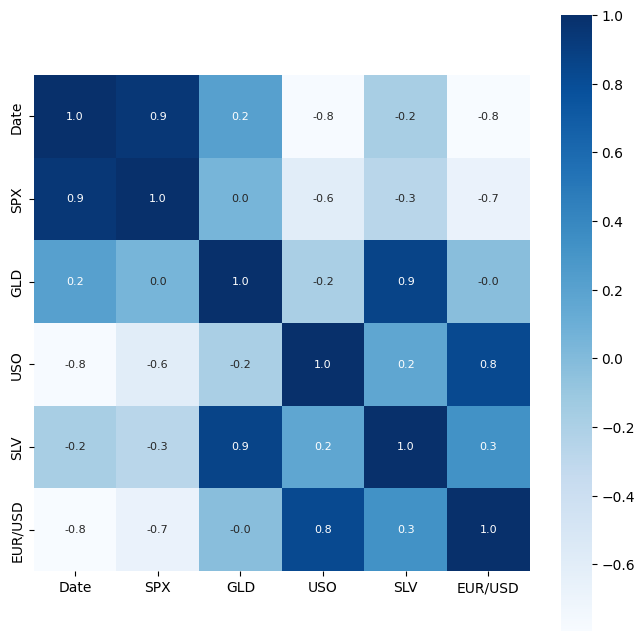

In [11]:
#construct heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [12]:
#correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-13-0d74661ed121>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

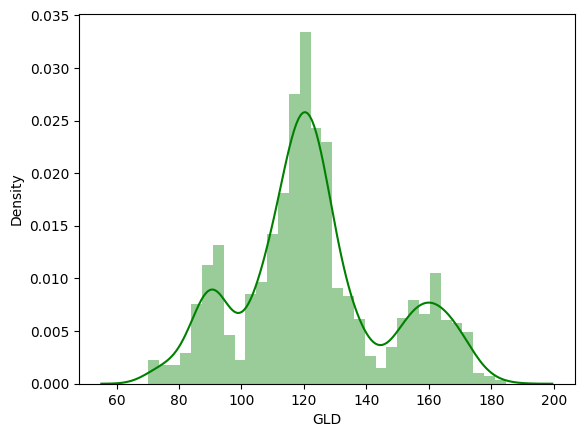

In [13]:
#check the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting Features and Target

In [14]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']
print(X)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and test data

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

In [17]:
regressor=RandomForestRegressor(n_estimators=100)

In [18]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [19]:
#prediction on Test Data
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[168.49849933  81.66150007 115.74520003 127.56730043 120.65140094
 154.72669755 150.45719856 125.97970066 117.50969871 126.13540028
 116.47860121 171.74010119 141.77389895 167.77729857 115.2173997
 117.73740028 137.53330353 169.77910056 160.05150309 155.87759924
 155.12119973 125.31210018 176.03139948 157.46830277 125.34830007
  93.63399991  78.0011002  120.62440012 119.04999922 167.56669953
  88.25970038 125.26580036  91.05420112 117.78660018 121.1106993
 135.95080117 115.29420124 115.231401   147.64989899 107.33900116
 103.98820239  87.06909784 126.50390079 117.88070007 152.87589903
 119.54390028 108.38909975 108.08349828  93.30560059 127.00339778
  75.00270033 113.67099958 121.29440021 111.1853992  118.89149886
 120.6302996  159.10379969 168.28460078 146.91289654  85.63589846
  94.4277003   86.97859895  90.64799985 119.01710047 126.40570075
 127.43899981 169.04300023 122.18429916 117.38129868  98.57380025
 167.40840061 143.16879794 132.54040234 121.17010176 121.1408992
 119.6214006 

In [20]:
# R squared Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.9890661059614634


Compare the Actual Values and Predicted Values

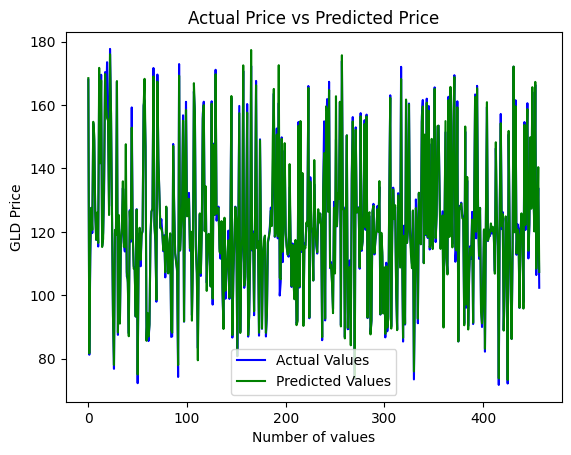

In [23]:
Y_test=list(Y_test)
plt.plot(Y_test,color='blue',label='Actual Values')
plt.plot(test_data_prediction,color='green',label='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()